In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task2-salmon.ipynb")

# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/IsabellaSegarra/eds220-hwk2


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

<Axes: title={'center': 'Estimated Average Salmon Catch by Region'}, xlabel='Year', ylabel='Salmon catch (thousands of fish)'>

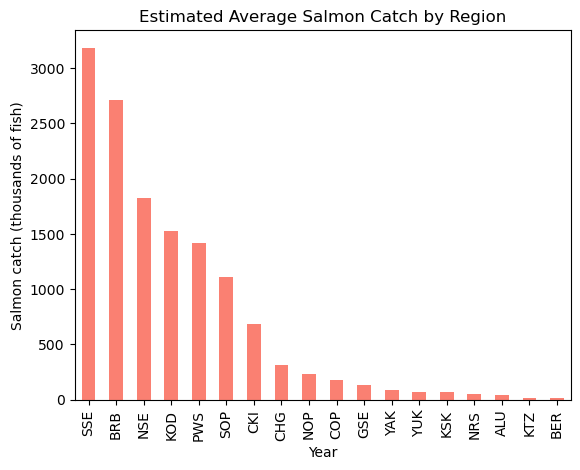

In [41]:
# FINAL CODE
import pandas as pd 
'''
Read in Salmon Catch data   
'''
catch_data = pd.read_csv('data/salmon_data.csv')

# Data wrangling 

# Drop the 'notesRegCode' column
catch_data = catch_data.drop(columns = 'notesRegCode')

# Replace 'I' with '1' in the 'Catch' column and convert to 'int64'
catch_data['Catch'] = catch_data['Catch'].replace("I", "1").astype('int64')

# Group the 'catch_data' by 'Region' and calculate the mean of the 'Catch' column
avg_region = catch_data.groupby('Region')['Catch'].mean()

# Plot the 'avg_region' dataframe
avg_region.sort_values(ascending=False).plot(
    kind='bar',
    x='Year',
    y='Catch',
    title='Estimated Average Salmon Catch by Region',
    xlabel='Year',
    ylabel='Salmon catch (thousands of fish)',
    color='#FA8072'
)


## 1

a. Uset this code cell to import the data from the `salmon_data.csv` as `catch_data`. Look at the head of the dataframe. 

<!-- BEGIN QUESTION -->



In [2]:
# a.
import pandas as pd 

catch_data = pd.read_csv('data/salmon_data.csv')


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use this code cell to make some other preliminary data exploration of your choosing.

In [38]:
# b.
print(catch_data.head(n = 3)) # View the first couple rows of data 
print(catch_data.shape) # View the number of rows and columns of the data
print(catch_data.info()) # View the non-null count and data types of each column 
print(catch_data.columns) # View the column names 
print(catch_data.nunique()) # View unique values in each column 

  Region  Year  Species  Catch
0    SSE  1886  Chinook      0
1    SSE  1887  Chinook      0
2    SSE  1888  Chinook      0
(8540, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8540 entries, 0 to 8539
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Region   8540 non-null   object
 1   Year     8540 non-null   int64 
 2   Species  8540 non-null   object
 3   Catch    8540 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 267.0+ KB
None
Index(['Region', 'Year', 'Species', 'Catch'], dtype='object')
Region       18
Year        120
Species       5
Catch      1878
dtype: int64


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

When exploring data, I prefer to view the data frame first with `head()` and learn a little about what the data looks like such as the naming conventions of columns, the index, and the columns that are less intuitive and require me to use the metadata. After this step, I explore other features of the data, including `shape` attribute to view the number of rows and columns, this told me that the data had over 8,000 rows and 4 columns. Additionally, I used the `info()` to view the data types, non-null count, and colulmns of the data. This told me that the Year and Catch column were both assigned as the wrong data type. Lastly, I looked at the unique values in the dataframe, noticing that Region has 18 distinct regions which is going to be helpful for analysis later. 

<!-- END QUESTION -->

## 2
In the next cell:

a. Store the unique values of the `notesRegCode` column in the `notes_unique` variable. 

In [4]:
# Isolate the unique values from the 'notesRegCode' column with '.unique()' function

notes_unique = catch_data['notesRegCode'].unique()
print(notes_unique) 

[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

In [5]:
grader.check("q2a")

q2a results: All test cases passed!

b. Update the dataframe so it doesn't include the `notesRegCode` column. Verify the column is no longer in the dataframe.

In [6]:
# Drop the 'notesRegCode' column with the '.drop()' function

catch_data = catch_data.drop(columns = 'notesRegCode')

In [7]:
grader.check("q2b")

q2b results: All test cases passed!

<!-- BEGIN QUESTION -->

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


No, the `Year` column of the `catch_data` data is inputted as an integer or 'int64' when it needs to be a time series or 'datetime64'. Additionally, the `Catch` column needs to be written as an 'int64' instead of an object.  

In [8]:
catch_data.dtypes

Region     object
Year        int64
Species    object
Catch      object
dtype: object

<!-- END QUESTION -->

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [9]:
catch_data['Catch'].astype('int64')

ValueError: invalid literal for int() with base 10: 'I'

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output. Store your answer in the `catch_I` variable. `catch_I` should have one observation and contain the following columns: Region, Year, Species, Catch. It should contain the original index number in order to pass the test. 

In [9]:
# Isolate the 'Catch' column and return the letter 'I' 
catch_I = catch_data['Catch'] == "I"
catch_I  # This returns a Boolean TRUE/FALSE statement

0       False
1       False
2       False
3       False
4       False
        ...  
8535    False
8536    False
8537    False
8538    False
8539    False
Name: Catch, Length: 8540, dtype: bool

In [10]:
grader.check("q5")

q5 results: All test cases passed!

## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed and store this singe row in the `catch_1` variable. 

<!-- BEGIN QUESTION -->



In [12]:
catch_data['Catch'] = catch_data[catch_data['Catch'] == "I"].replace("I", "1")

In [12]:
# Update the 'Catch' column by using '.replace()' to replace all 'I's with '1's
catch_data['Catch'] = catch_data['Catch'].replace("I", "1")

In [13]:
catch_data.head()

,Region,Year,Species,Catch
0,SSE,1886,Chinook,0
1,SSE,1887,Chinook,0
2,SSE,1888,Chinook,0
3,SSE,1889,Chinook,0
4,SSE,1890,Chinook,0


In [14]:
# Update the 'Catch' column by isolating the column, turning it into a string and replacing 
catch_1 = catch_data['Catch'].iloc[400]

# Print catch_1
catch_1

'1'

<!-- END QUESTION -->

## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type. Store the type of the `catch` column in the `catch_column_type` variable.

In [15]:
# Update the 'Catch' column as an integer data type with the 'astype()' function
catch_data['Catch'] = catch_data['Catch'].astype('int64')

In [16]:
# Check data types of the columns
catch_data.dtypes

Region     object
Year        int64
Species    object
Catch       int64
dtype: object

In [17]:
# Isolate the data types of the 'Catch' column
catch_column_type = catch_data['Catch'].dtypes
catch_column_type

dtype('int64')

In [18]:
grader.check("q7")

q7 results: All test cases passed!

<!-- BEGIN QUESTION -->

## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [13]:
catch_data.dtypes

Region     object
Year        int64
Species    object
Catch       int64
dtype: object

In [21]:
# Group by the 'Region' column from the 'catch_data' and calculate the mean of the 'Catch' column
avg_region = catch_data.groupby('Region')['Catch'].mean()
avg_region

Region
ALU      40.383908
BER      16.372549
BRB    2709.796491
CHG     315.487273
CKI     683.571429
COP     179.223404
GSE     133.841463
KOD    1528.350000
KSK      67.642353
KTZ      18.836145
NOP     229.493478
NRS      51.502703
NSE    1825.020870
PWS    1419.236697
SOP    1110.942222
SSE    3184.660714
YAK      91.922917
YUK      68.645570
Name: Catch, dtype: float64

In [22]:
# Check the data type of the 'avg_region' column
avg_region.dtypes 

dtype('float64')

In [37]:
grader.check("q8")

q8 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

<Axes: title={'center': 'Estimated Average Salmon Catch by Region'}, xlabel='Year', ylabel='Salmon catch (thousands of fish)'>

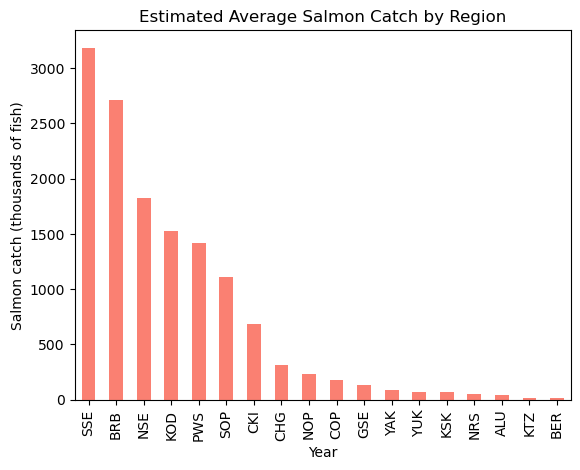

In [25]:

avg_region.sort_values(ascending=False).plot(
    kind='bar',
    x='Year',
    y='Catch',
    title='Estimated Average Salmon Catch by Region',
    xlabel='Year',
    ylabel='Salmon catch (thousands of fish)',
    color='#FA8072'
)


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 10

Write a brief description with key takeaways from the plot. Your answer shuld use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

<!-- END QUESTION -->

## 11

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()